In [1]:
import pandas as pd

In [2]:
abalone = pd.read_csv('dataset/abalone.data', header=None)

In [3]:
abalone.head()

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
iris = pd.read_csv('dataset/iris.csv')

In [5]:
iris.head()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [6]:
iris = iris.drop(columns='Unnamed: 0')

In [7]:
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
abalone.columns = ['Sex', 'Length', 'Diameter', 'Height',
'Whole weight','Shucked weight', 'Viscera weight', 'Shell weight',
'Rings']

In [11]:
nutri = pd.read_csv('dataset/nutrition_elderly.csv')

In [12]:
pd.set_option('display.max_columns', 8)

In [13]:
nutri.head()

,gender,situation,tea,coffee,...,raw_fruit,cooked_fruit_veg,chocol,fat
0,2,1,0,0,...,1,4,5,6
1,2,1,1,1,...,5,5,1,4
2,2,1,0,4,...,5,2,5,4
3,2,1,0,0,...,4,0,3,2
4,2,1,2,1,...,5,5,3,2


In [14]:
nutri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   gender            226 non-null    int64
 1   situation         226 non-null    int64
 2   tea               226 non-null    int64
 3   coffee            226 non-null    int64
 4   height            226 non-null    int64
 5   weight            226 non-null    int64
 6   age               226 non-null    int64
 7   meat              226 non-null    int64
 8   fish              226 non-null    int64
 9   raw_fruit         226 non-null    int64
 10  cooked_fruit_veg  226 non-null    int64
 11  chocol            226 non-null    int64
 12  fat               226 non-null    int64
dtypes: int64(13)
memory usage: 23.1 KB


In [15]:
DICT = {1: 'Male', 2: 'Female'}
nutri['gender'] = nutri['gender'].replace(DICT)
nutri['gender'] = nutri['gender'].astype('category')
nutri['height'] = nutri['height'].astype(float)

In [16]:
nutri['fat'].describe()

count    226.000000
mean       3.814159
std        1.473009
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        8.000000
Name: fat, dtype: float64

In [17]:
nutri['fat'].value_counts()

4    68
3    48
5    40
2    27
6    23
1    15
8     4
7     1
Name: fat, dtype: int64

In [18]:
pd.crosstab(nutri.gender, nutri.situation)

situation,1,2,3
gender,,,
Female,78,56,7
Male,20,63,2


In [20]:
pd.crosstab(nutri.gender, nutri.situation, margins=True)

situation,1,2,3,All
gender,,,,
Female,78,56,7,141
Male,20,63,2,85
All,98,119,9,226


In [21]:
nutri['height'].mean()

163.96017699115043

In [22]:
nutri['height'].quantile(q=[0.25, 0.5, 0.75])

0.25    157.0
0.50    163.0
0.75    170.0
Name: height, dtype: float64

In [23]:
nutri['height'].max() - nutri['height'].min()

48.0

In [24]:
round(nutri['height'].var(), 2)

81.06

In [25]:
round(nutri['height'].std(), 2)

9.0

In [26]:
nutri['height'].describe()

count    226.000000
mean     163.960177
std        9.003368
min      140.000000
25%      157.000000
50%      163.000000
75%      170.000000
max      188.000000
Name: height, dtype: float64

In [27]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
DICT_SITUATION = {2: 'Couple', 1: 'Single', 3: 'Family'}
nutri['situation'] = nutri['situation'].replace(DICT_SITUATION)
situation_count = nutri['situation'].value_counts()

In [29]:
width = 0.35
x = [0, 0.8, 1.6]

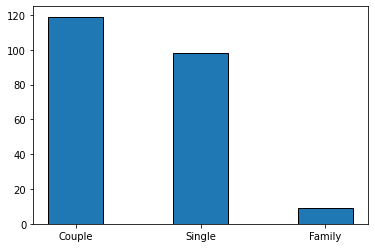

In [30]:
plt.bar(x, situation_count, width, edgecolor='black')
plt.xticks(x, situation_count.index)
plt.show()

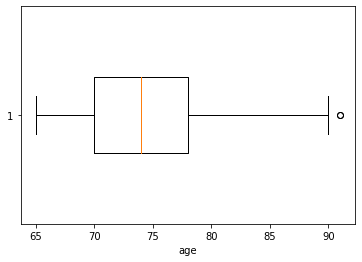

In [32]:
plt.boxplot(nutri['age'], widths=width, vert=False)
plt.xlabel('age')
plt.show()

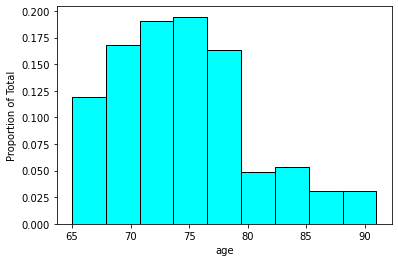

In [33]:
weights = np.ones_like(nutri.age)/nutri.age.count()
plt.hist(nutri.age, bins=9, weights=weights, facecolor='cyan', edgecolor='black', linewidth=1)
plt.xlabel('age')
plt.ylabel('Proportion of Total')
plt.show()

In [34]:
x = np.sort(nutri.age)
y = np.linspace(0, 1, len(nutri.age))

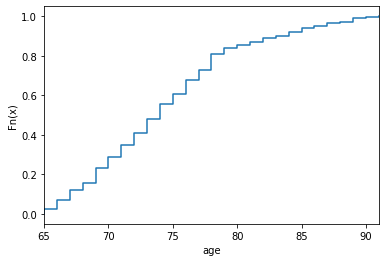

In [35]:
plt.xlabel('age')
plt.ylabel('Fn(x)')
plt.step(x, y)
plt.xlim(x.min(), x.max())
plt.show()

In [36]:
import seaborn as sns

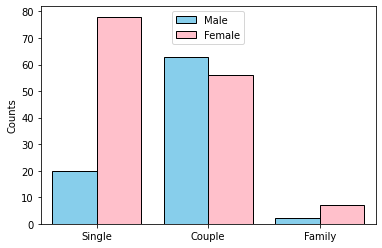

In [37]:
sns.countplot(x='situation', hue='gender', data=nutri, hue_order=['Male', 'Female'], palette=['SkyBlue', 'Pink'], saturation=1, edgecolor='black')
plt.legend(loc='upper center')
plt.xlabel('')
plt.ylabel('Counts')
plt.show()

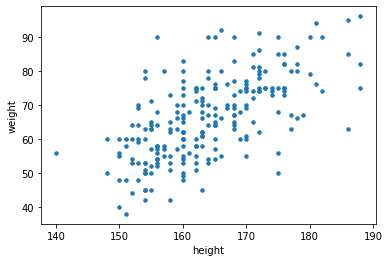

In [38]:
plt.scatter(nutri.height, nutri.weight, s=12, marker='o')
plt.xlabel('height')
plt.ylabel('weight')
plt.show()

In [43]:
dataname = 'dataset/birthwt.csv'
bwt = pd.read_csv(dataname)

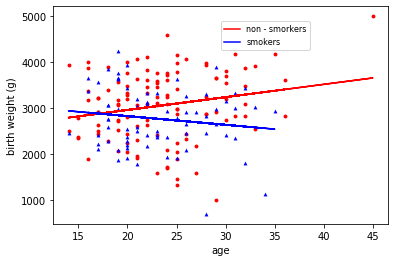

In [44]:
bwt = bwt.drop(columns='Unnamed: 0')
styles = {0: ['o', 'red'], 1: ['^', 'blue']}
for k in styles:
    grp = bwt[bwt.smoke == k]
    m, b = np.polyfit(grp.age, grp.bwt, 1)
    plt.scatter(grp.age, grp.bwt, c=styles[k][1], s=15, linewidths=0, marker=styles[k][0])
    plt.plot(grp.age, m*grp.age + b, '-', color=styles[k][1])
plt.xlabel('age')
plt.ylabel('birth weight (g)')
plt.legend(['non - smorkers', 'smokers'], prop={'size':8}, loc=(0.5, 0.8))
plt.show()

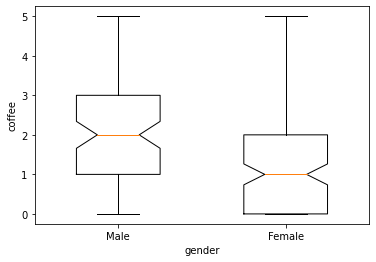

In [45]:
males = nutri[nutri.gender == 'Male']
females = nutri[nutri.gender == 'Female']
plt.boxplot([males.coffee, females.coffee], notch=True, widths=(0.5, 0.5))
plt.xlabel('gender')
plt.ylabel('coffee')
plt.xticks([1, 2], ['Male', 'Female'])
plt.show()